<a href="https://colab.research.google.com/github/larissafbatista/Manipulando-dados-OSM/blob/main/osm_dpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pré-processamento**

In [ ]:
# Instalando geopandas, OSMnx, Matplotlib
!pip install geopandas
!pip install OSMnx
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline 

import fiona

Obs.: Ao se utilizar 'geometries_from_polygon' pode-se especificar a planície de inundação.


### **Obtendo dados**

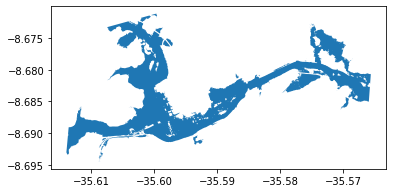

In [ ]:
#Plotar shapefile
shapefile = gpd.read_file("planicie_una_200_cb.shp")
shapefile.plot()
plt.show()

In [ ]:
# plt.savefig('planicie_una.jpg', dpi=300, size=(300, 300)) #Salvando jpg

In [ ]:
# Lembrar de carregar o shapefile em **coordenadas geográficas**!!!!!!!!!!!!!!

# Conversão de shapefile para shapely (Função do shapely)
from shapely.geometry import shape

c = fiona.open('planicie_una_200_cb.shp') # Lê o arquivo
poligono = c.next() # Retorna o próximo item numa interação?
planicie = shape(poligono['geometry']) # Função do shapely.geometries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  import sys


In [ ]:
type(planicie)

shapely.geometry.multipolygon.MultiPolygon

In [ ]:
# Buscando a rede viária do lugar de interesse
rede_viaria = ox.graph_from_polygon(planicie)
type(rede_viaria)

networkx.classes.multidigraph.MultiDiGraph

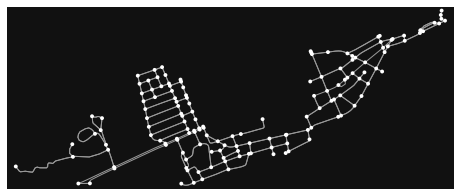

In [ ]:
# Plotando
fig, ax = ox.plot_graph(rede_viaria)

In [ ]:
# Buscando o limite do município
# place_name = "Palmares, Pernambuco, Brasil" 
# area = ox.geocode_to_gdf(place_name)

# area.plot()

In [ ]:
# Buscando edificações da área
edificios = ox.geometries_from_polygon(planicie, tags={'building':True})

<AxesSubplot:>

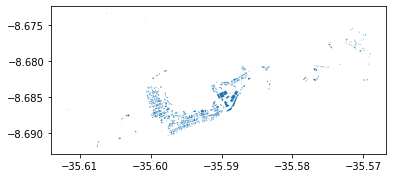

In [ ]:
edificios.plot()

In [ ]:
# plt.savefig('edificios_una.jpg', dpi=300, size=(300, 300)) # Salvando jpg

In [ ]:
# Checando quantidades
print(f'Existem em {len(edificios)} edifícios na base de dados para a área em questão.')

Existem em 858 edifícios na base de dados para a área em questão.


In [ ]:
# Checando a tabela de atributos
edificios.head()

geometry  \
element_type osmid                                                          
way          548927715  POLYGON ((-35.59044 -8.68616, -35.59078 -8.686...   
             692737417  POLYGON ((-35.59393 -8.68803, -35.59375 -8.687...   
             692737422  POLYGON ((-35.59295 -8.68705, -35.59281 -8.686...   
             692737424  POLYGON ((-35.59399 -8.68694, -35.59362 -8.686...   
             692737425  POLYGON ((-35.59120 -8.68568, -35.59105 -8.685...   

                                                                    nodes  \
element_type osmid                                                          
way          548927715  [4080775272, 5302742576, 5302742577, 530274257...   
             692737417  [6503612987, 6503612988, 6503612989, 650361299...   
             692737422  [6503613094, 6503613095, 6503613096, 650361309...   
             692737424  [6503613106, 6503613107, 6503613108, 650361310...   
             692737425  [6503613124, 6503613125, 6503613126, 650361312...   

                       building                    name         shop amenity  \
element_type osmid                                                             
way          548927715      yes  Supermercado Confiança  supermarket     NaN   
             692737417      yes                     NaN          NaN     NaN   
             692737422      yes                     NaN          NaN     NaN   
             692737424      yes                     NaN          NaN     NaN   
             692737425      yes                     NaN          NaN     NaN   

                        bus public_transport denomination religion layer  
element_type osmid                                                        
way          548927715  NaN              NaN          NaN      NaN   NaN  
             692737417  NaN              NaN          NaN      NaN   NaN  
             692737422  NaN              NaN          NaN      NaN   NaN  
             692737424  NaN              NaN          NaN      NaN   NaN  
             692737425  NaN              NaN          NaN      NaN   NaN

In [ ]:
# Todas as informações contidas na tabela
edificios.columns

Index(['geometry', 'nodes', 'building', 'name', 'shop', 'amenity', 'bus',
       'public_transport', 'denomination', 'religion', 'layer'],
      dtype='object')

In [ ]:
# Buscando outros itens (amenities: restaurantes)
socioecon = ox.geometries_from_polygon(planicie, tags = {'amenity':True, 'landuse':True, 'leisure': True, 'tourism': True})

Obs.:As tags definem que informação se vai buscar.

In [ ]:
# Todas as informações contidas na tabela
socioecon.columns

Index(['amenity', 'name', 'opening_hours', 'operator', 'geometry', 'religion',
       'addr:city', 'addr:housenumber', 'addr:street', 'addr:suburb', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'phone', 'website', 'cuisine',
       'takeaway', 'denomination', 'lit', 'addr:postcode', 'note',
       'townhall:type', 'opening_hours:covid19', 'nodes', 'leisure', 'landuse',
       'cycleway', 'footway', 'surface', 'building', 'bus',
       'public_transport'],
      dtype='object')

In [ ]:
# Selecionando apenas alguns dos atributos
cols = ['name', 'geometry', 'amenity', 'leisure', 'landuse']
socioecon[cols].head()

name  \
element_type osmid                                           
node         4988932745                 Cine Teatro Apollo   
             5302742560                 Assembléia De Deus   
             5302742562                         Milk Shake   
             5302742563                       Açaí Concept   
             5302742567  Igreja Universal do Reino de Deus   

                                           geometry           amenity leisure  \
element_type osmid                                                              
node         4988932745  POINT (-35.58973 -8.68567)            cinema     NaN   
             5302742560  POINT (-35.59064 -8.68361)  place_of_worship     NaN   
             5302742562  POINT (-35.59008 -8.68483)         ice_cream     NaN   
             5302742563  POINT (-35.59003 -8.68495)         fast_food     NaN   
             5302742567  POINT (-35.59088 -8.68675)  place_of_worship     NaN   

                        landuse  
element_type osmid               
node         4988932745     NaN  
             5302742560     NaN  
             5302742562     NaN  
             5302742563     NaN  
             5302742567     NaN

In [ ]:
# Convertendo rede viária (MultiDiGraph) em GeoDataFrames
nodes, edges = ox.graph_to_gdfs(rede_viaria)

<AxesSubplot:>

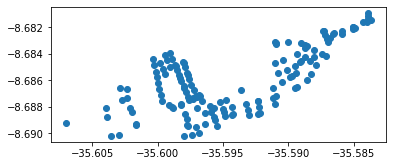

In [ ]:
type(nodes)
nodes.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

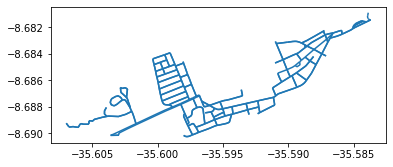

In [ ]:
print(type(edges))
edges.plot()

In [ ]:
# plt.savefig('rede_viaria_una.jpg', dpi=300, size=(300, 300)) # Salvando jpg

In [ ]:
edges.head()

osmid                            name  \
u         v          key                                              
848015896 7035534588 0    405944548              Rua Coronel Izacio   
848015903 4080775566 0     71240095        Rua Manoel Alves Peixoto   
          4080798758 0    405944741         Avenida Clementino Melo   
848015950 4080775551 0    542076443            Avenida José Gouveia   
          4080775202 0    683628898  Avenida Coronel Pedro Paranhos   

                              highway  oneway  length  \
u         v          key                                
848015896 7035534588 0       tertiary   False  80.990   
848015903 4080775566 0    residential   False  47.539   
          4080798758 0    residential   False  50.987   
848015950 4080775551 0    residential   False   8.418   
          4080775202 0      secondary    True  74.505   

                                                                   geometry  \
u         v          key                                                      
848015896 7035534588 0    LINESTRING (-35.59082 -8.68548, -35.59079 -8.6...   
848015903 4080775566 0    LINESTRING (-35.59905 -8.68394, -35.59946 -8.6...   
          4080798758 0    LINESTRING (-35.59905 -8.68394, -35.59887 -8.6...   
848015950 4080775551 0    LINESTRING (-35.59884 -8.68810, -35.59887 -8.6...   
          4080775202 0    LINESTRING (-35.59884 -8.68810, -35.59822 -8.6...   

                             ref bridge  
u         v          key                 
848015896 7035534588 0       NaN    NaN  
848015903 4080775566 0       NaN    NaN  
          4080798758 0       NaN    NaN  
848015950 4080775551 0       NaN    NaN  
          4080775202 0    PE-103    NaN

In [ ]:
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'length', 'geometry', 'ref',
       'bridge'],
      dtype='object')

In [ ]:
# Tipos de rodovias no dataframe selecionado
print(edges['highway'].unique())

['tertiary' 'residential' 'secondary' 'path' 'unclassified' 'service'
 'footway' 'track' 'secondary_link']


In [ ]:
# Unindo os datasets
# ax = area.plot(facecolor='lightblue')
ax = edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F') #ruas
ax = edificios.plot(ax=ax, facecolor='khaki', alpha=0.7)
ax = socioecon.plot(ax=ax, color='green', alpha=0.7, markersize=10)

<Figure size 432x288 with 0 Axes>

In [ ]:
# Buscando áreas de interesse ambiental
ambiental = ox.geometries_from_polygon(planicie, tags={'protected_area':True})

In [ ]:
type(ambiental)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Checando tabela de atributos
teste = gpd.GeoDataFrame.isnull(ambiental)
print(teste)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [ ]:
# Verificação DPA
print(edificios.empty)
print(edges.empty)
print(ambiental.empty)
print(socioecon.empty)

False
False
True
False


### **Testes**



In [ ]:
#teste Sistema viário

import pandas as pd

rodovias_importantes = ['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 
                        'motorway_link', 'trunk_link', 'primary_link', 'secondary_link',
                        'tertiary_link', 'busway']
rodovias_secundarias = ['unclassified', 'residential', 'living_street', 'service',
                        'pedestrian', 'track', 'escape', 'raceway', 'footway',
                        'sidewlak', 'cycleway']

print(edges['highway'].isin(rodovias_importantes))

u           v           key
848015896   7035534588  0       True
848015903   4080775566  0      False
            4080798758  0      False
848015950   4080775551  0      False
            4080775202  0       True
                               ...  
9172640529  9172640532  0      False
9172640532  9172640529  0      False
9172640533  7033927214  0      False
            7033927226  0      False
9747562831  9172640529  0      False
Name: highway, Length: 386, dtype: bool


In [ ]:
#teste Atividades Socioeconômicas

# Tipos de rodovias no dataframe selecionado
print(socioecon['amenity'].unique(), '\n')
print(socioecon['landuse'].unique(),'\n')
print(socioecon['leisure'].unique(), '\n')

['cinema' 'place_of_worship' 'ice_cream' 'fast_food' 'school' 'library'
 'fountain' 'bank' 'college' 'townhall' 'restaurant' nan 'bus_station'] 

[nan 'grass' 'industrial' 'forest'] 

[nan 'park'] 



### **Classificando DPA**

In [ ]:
#Classificador (a) Volume Total do Reservatório

volume_reservatorio  = int(input("Informe o volume total do reservatório em milhões de m³: "))   

def class_volume(volume_reservatorio):
  contador = 0
  if volume_reservatorio <= 5:
    contador += 1
    print("Reservatório Pequeno (1)")
  elif 5 < volume_reservatorio <= 75:
    contador += 2
    print("Reservatório Médio (2)")
  elif 75 < volume_reservatorio <= 200:
    contador += 3
    print("Reservatório Grande (3)")
  else:
    contador += 5
    print("Reservatório Muito Grande (5)")
  
  return contador


#Classificador (b) Potencial de perdas de vidas humanas

rodovias_importantes = ['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 
                        'motorway_link', 'trunk_link', 'primary_link', 'secondary_link',
                        'tertiary_link', 'busway']
rodovias_secundarias = ['unclassified', 'residential', 'living_street', 'service',
                        'pedestrian', 'track', 'escape', 'raceway', 'footway',
                        'sidewlak', 'cycleway']

def class_vidas():
  contador = 0
  if edificios.empty == False:
    contador += 12
    print('Potencial de perdas de vidas humanas Existente (12)')
  elif edificios.empty == True:
    contador += 0
    if edges.empty == False and edges['highway'].isin(rodovias_importantes) == True:
      contador += 8
      print('Potencial de perdas de vidas humanas Frequente (8)')
    elif edges.empty == False and edges['highway'].isin(rodovias_secundarias) == True:
      contador += 4
      print('Potencial de perdas de vidas humanas Frequente (4)')
    else:
      contador += 0  
      print('Potencial de perdas de vidas humanas Inexistente (0)') 

  return contador


# Classificador (c) Impacto Ambiental 

def class_ambiental():
  contador = 0
  if ambiental.empty == False:
    contador += 5
    print('Impacto ambiental muito significativo (5)')
  elif ambiental.empty == True:
    contador += 3
    print('Impacto ambiental significativo (3)')

  return contador


# Classificador (d) Impacto Socioeconômico

adensado = ['commercial', 'residential', 'industrial', 'education','construction', 
            'retail', 'brownfield', 'cemetery', 'garages', 'greenfield', 'port', 
            'recreation_ground', 'religious', 'military', 'village_green']
            

nao_adensado = ['allotments',  'farmland', 'farmyard', 'flowerbed', 'forest', 
                'meadow', 'orchard', 'vineyard', 'aquaculture', 'grass', 'landfill']

def class_socioecon():
  contador = 0
  if socioecon.empty == False:
    if socioecon['amenity'].empty == False or socioecon['landuse'].isin(adensado):
      contador += 5
      print('Impacto Socioeconômico Alto (5)')
    elif socioecon['leisure'].empty == False or socioecon['landuse'].isin(nao_adensado):
      contador += 1
      print('Impacto Socioeconômico Baixo (1)')
  elif socioecon.empty == True:
    contador += 0
    print('Impacto Socioeconômico Inexistente (0)')
  print("\n ATENÇÃO: a classe Impacto Socioeconômico MÉDIO NÃO foi considerada")
  return contador


#DPA
dpa = class_volume (volume_reservatorio) + class_vidas() + class_ambiental() + class_socioecon()
print(f'\nSomatório DPA: {dpa}')

def class_dpa():
  if dpa <= 10:
    print('\033[1m' + 'Dano Potencial Associado BAIXO' + '\033[0m')
  elif 10 < dpa <16:
    print('\033[1m' + 'Dano Potencial Associado MÉDIO' + '\033[0m')
  else:
    print('\033[1m' + 'Dano Potencial Associado ALTO' + '\033[0m')

class_dpa()
  

Informe o volume total do reservatório em milhões de m³: 200
Reservatório Grande (3)
Potencial de perdas de vidas humanas Existente (12)
Impacto ambiental significativo (3)
Impacto Socioeconômico Alto (5)

 ATENÇÃO: a classe Impacto Socioeconômico MÉDIO NÂO foi considerada

Somatório DPA: 23
Dano Potencial Associado ALTO
